<a href="https://colab.research.google.com/github/SaqlainHussainShah/implementation-of-sdi/blob/master/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is intended to apply ML algorithms on IDS dataset for multiclass classification

##### Steps Followed
   1. Data Cleansing
   2. Feature selection
   3. Creation of Train/Test data
   4. Implementation of ML Algorithms
   5. Evalutaion

In [0]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

# import pickle
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split     # import module for train test split

## 1. Data Cleansing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv("/content/drive/My Drive/multiclass-multidays.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df[' Label'].value_counts()

BENIGN                      2272688
DoS Hulk                     230124
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack-Brute Force         1507
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name:  Label, dtype: int64

In [0]:
df.head()

,Unnamed: 0,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,0,220.0,135.557286,107.349008,640.0,17187.5,640,62.857143,358.0,1246875,440.0,64.000000,89.5,445.0,103.345698,7,4,BENIGN
1,1,300.0,192.795228,132.287566,900.0,14444.44444,900,66.666667,2944.0,3937777.778,600.0,75.000000,736.0,684.0,849.859596,9,4,BENIGN
2,2,1388.0,236.433336,677.274651,1205.0,9128.630705,1205,396.571429,2830.0,4652282.158,2776.0,120.500000,707.5,777.0,816.950631,7,4,BENIGN
3,3,226.0,90.767652,110.276708,511.0,21526.41879,511,64.571429,370.0,1608610.568,452.0,51.100000,92.5,299.0,106.809800,7,4,BENIGN
4,4,306.0,148.698266,134.933317,773.0,16817.59379,773,68.000000,2944.0,4600258.732,612.0,64.416667,736.0,531.0,849.859596,9,4,BENIGN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829385 entries, 0 to 2829384
Data columns (total 18 columns):
Unnamed: 0                      int64
 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 object
 Flow Duration                  int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    object
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets              int64
 Total Backward Packets         int64
 Label                          object
dtypes: float64(11), int64(4), object(3)
memory usage: 388.6+ MB


#### read all csv files

In [0]:
import glob
t1=time.time()

path = "../dataset/TrafficLabelling" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
t2=time.time()
print("time taken to read All csv :: ", t2-t1, " seconds ")

/home/ebryx/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ebryx/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


time taken to read All csv ::  59.14720845222473  seconds 


In [0]:
df.groupby(' Label').first()

,Unnamed: 0,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
Label,,,,,,,,,,,,,,,,,
BENIGN,0,403.0,5.798698e+06,204.724205,113000000.0,0.425755776,112740690,201.500000,1152.0,67.41133126,6448.0,2.398738e+06,72.000000,16400000.0,0.000000,32,16
Bot,24072,322.0,4.901981e+06,107.333333,51200000.0,0.29899021,60202640,35.777778,256.0,9.600907867,322.0,3.541332e+06,28.444444,10200000.0,85.333333,9,9
DDoS,209916,20.0,4.308658e+05,10.263203,747.0,7.72921768,1293792,8.666667,11607.0,8991.398927,26.0,1.437547e+05,1658.142857,1292730.0,2137.297080,3,7
DoS GoldenEye,2180471,341.0,1.768253e+06,170.500000,6531.0,1.796824293,5008837,85.250000,3525.0,771.8358572999999,341.0,6.261046e+05,705.000000,5002306.0,990.644740,4,5
DoS Hulk,1924298,382.0,2.291299e+02,220.547803,975.0,4792.332268,1878,127.333333,11595.0,6377529.286,382.0,2.347500e+02,1932.500000,577.0,2182.468304,3,6
DoS Slowhttptest,1918713,356.0,2.236413e+03,159.208040,16045.0,498.597694,16045,71.200000,1964.0,144593.3313,356.0,2.292143e+03,654.666667,5415.0,1133.915929,5,3
DoS slowloris,1855996,410.0,1.368409e+06,185.758628,218783.0,2.707953414,5169956,137.625000,4222.0,1029.602573,1101.0,3.976889e+05,703.666667,4951173.0,1395.868284,8,6
FTP-Patator,1414876,0.0,3.010454e+06,0.000000,5216127.0,0.766852494,5216127,0.000000,0.0,0,0.0,1.738709e+06,0.000000,5214882.0,0.000000,3,1
Heartbleed,2446568,517.0,1.746258e+05,16.858421,119000000.0,36.99831575,119302728,3.090875,7556917.0,63411.92802,8299.0,2.703438e+04,4370.686524,5024984.0,2566.935004,2685,1729


##### ==>> Finding and dropping undefined / incorrect values in data frame

In [0]:
df=df.dropna( axis=0, how='any')

In [0]:
df=df.replace(',,', np.nan, inplace=False)

<br>
We see that Fwd Header Length comes twice but with different anmes so first change name of Fwd Header Length.1 to Fwd Header Length and then remove it

In [0]:
df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=True)

In [0]:
len(df.columns)


18


##### ==>>convert categorical and string data to numerical data
Flow ID, Source IP, Destination IP, Timestamp, External IP <br>
using LabelEncoder of sklearn

In [0]:
from sklearn import preprocessing      # import required package for labelencoding
le=preprocessing.LabelEncoder()        # create a label encoder (category) object
le.fit(df['Flow ID'])

In [0]:
# labels
le.classes_
# Apply fitted encoder to the pandas column
le.transform(df["Flow ID"])

array([ 819574,  819732, 1085070, ...,  428373,  602218,  961807])

In [0]:
le_s_ip=preprocessing.LabelEncoder()
le_s_ip.fit(df[' Source IP'])
le_s_ip.transform(df[' Source IP'])

array([ 4721,  4721, 16487, ...,  4713,  4721,  4722])

In [0]:
le_d_ip=preprocessing.LabelEncoder()
le_d_ip.fit(df[' Destination IP'])
le_d_ip.transform(df[' Destination IP'])

array([ 5453,  5453, 18363, ..., 10351,  5452, 18797])

In [0]:
le_time_stamp=preprocessing.LabelEncoder()
le_time_stamp.fit(df[' Timestamp'])
le_time_stamp.transform(df[' Timestamp'])

array([27904, 27904, 27905, ..., 27419, 27419, 27419])

In [0]:
group=df.groupby(' Label')
group.first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.3-192.168.10.50-3268-56108-6,192.168.10.50,56108,192.168.10.3,3268,6,7/7/2017 8:59,112740690,32,16,...,15,32,359.428571,11.998016,380.0,343.0,16100000.0,498804.82030,16400000.0,15400000.0
Bot,192.168.10.12-52.6.13.28-42544-8080-6,192.168.10.12,42544,52.6.13.28,8080,6,7/7/2017 9:34,60202640,9,9,...,1,32,63678.200000,22252.535960,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
DDoS,172.16.0.1-192.168.10.50-49650-80-6,172.16.0.1,49650,192.168.10.50,80,6,7/7/2017 3:56,1293792,3,7,...,2,20,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS GoldenEye,172.16.0.1-192.168.10.50-58958-80-6,172.16.0.1,58958,192.168.10.50,80,6,5/7/2017 11:10,5008837,4,5,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Hulk,172.16.0.1-192.168.10.50-50748-80-6,172.16.0.1,50748,192.168.10.50,80,6,5/7/2017 10:43,1878,3,6,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS Slowhttptest,172.16.0.1-192.168.10.50-33372-80-6,172.16.0.1,33372,192.168.10.50,80,6,5/7/2017 10:15,16045,5,3,...,1,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS slowloris,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631,192.168.10.50,80,6,5/7/2017 2:24,5169956,8,6,...,7,20,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
FTP-Patator,172.16.0.1-192.168.10.50-45422-80-6,172.16.0.1,45422,192.168.10.50,80,6,4/7/2017 10:30,5216127,3,1,...,0,32,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0
Heartbleed,172.16.0.1-192.168.10.51-45022-444-6,172.16.0.1,45022,192.168.10.51,444,6,5/7/2017 3:12,119302728,2685,1729,...,118,32,2217.000000,0.000000,2217.0,2217.0,5024984.0,0.00000,5024984.0,5024984.0


In [0]:
df.replace('SSH-Patator', 'ATTACK', inplace=True)
df.replace('Web Attack-XSS', 'ATTACK', inplace=True)
df.replace('Web Attack-Sql Injection', 'ATTACK', inplace=True)
df.replace('Web Attack-Brute Force', 'ATTACK', inplace=True)
df.replace('PortScan', 'ATTACK', inplace=True)
df.replace('Infiltration', 'ATTACK', inplace=True)
df.replace('Bot', 'ATTACK', inplace=True)
df.replace('DDoS', 'ATTACK', inplace=True)
df.replace('DoS GoldenEye', 'ATTACK', inplace=True)
df.replace('DoS Hulk', 'ATTACK', inplace=True)
df.replace('DoS Slowhttptest', 'ATTACK', inplace=True)
df.replace('DoS slowloris', 'ATTACK', inplace=True)
df.replace('FTP-Patator', 'ATTACK', inplace=True)
df.replace('Heartbleed', 'ATTACK', inplace=True)

In [0]:
df[[' Flow Packets/s', 'Flow Bytes/s']].replace('Infinity', -1, inplace=True)
df[[' Flow Packets/s', 'Flow Bytes/s']].replace('NaN', 0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# 2. Feature Selection

Adding features with most importance for ssh patator and ftp patator 
1. FW Packet length max 

2. flow duration
3. flow packets/s
4. fwd IAt total
5. flow IAT std

6. Fwd packet length std
7. fwd packet length mean
8. total length of backward packets
9. flow bytes/s
10. total length of fwd packets
11. flow iat mean

and some other features that give good results for
12. Bot(Bwd Packet Length Mean)
13. DDos(Bwd Packet Length Std)
14. DDos golden eye (Flow IAT Max)
15. Total Fwd Packets
16. Total Backward Packets'


In [0]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Packets/s',' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Flow Bytes/s", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets'," Label"]
df=df[features].copy()
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220.0,135.557286,107.349008,640.0,17187.5,640,62.857143,358.0,1246875,440.0,64.000000,89.5,445.0,103.345698,7,4,BENIGN
1,300.0,192.795228,132.287566,900.0,14444.44444,900,66.666667,2944.0,3937777.778,600.0,75.000000,736.0,684.0,849.859596,9,4,BENIGN
2,1388.0,236.433336,677.274651,1205.0,9128.630705,1205,396.571429,2830.0,4652282.158,2776.0,120.500000,707.5,777.0,816.950631,7,4,BENIGN
3,226.0,90.767652,110.276708,511.0,21526.41879,511,64.571429,370.0,1608610.568,452.0,51.100000,92.5,299.0,106.809800,7,4,BENIGN
4,306.0,148.698266,134.933317,773.0,16817.59379,773,68.000000,2944.0,4600258.732,612.0,64.416667,736.0,531.0,849.859596,9,4,BENIGN


In [0]:
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220.0,135.557286,107.349008,640.0,17187.5,640,62.857143,358.0,1246875,440.0,64.000000,89.5,445.0,103.345698,7,4,BENIGN
1,300.0,192.795228,132.287566,900.0,14444.44444,900,66.666667,2944.0,3937777.778,600.0,75.000000,736.0,684.0,849.859596,9,4,BENIGN
2,1388.0,236.433336,677.274651,1205.0,9128.630705,1205,396.571429,2830.0,4652282.158,2776.0,120.500000,707.5,777.0,816.950631,7,4,BENIGN
3,226.0,90.767652,110.276708,511.0,21526.41879,511,64.571429,370.0,1608610.568,452.0,51.100000,92.5,299.0,106.809800,7,4,BENIGN
4,306.0,148.698266,134.933317,773.0,16817.59379,773,68.000000,2944.0,4600258.732,612.0,64.416667,736.0,531.0,849.859596,9,4,BENIGN


### Saved preprocessed cleaned data to cleaned folder

In [0]:
df.to_csv("/content/drive/My Drive/multiclass-multidays.csv")

In [3]:
df=pd.read_csv("/content/drive/My Drive/multiclass-multidays.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("NaN", 0, inplace=True)

In [5]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float")
df.dtypes

Unnamed: 0                        int64
 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
 Label                           object
dtype: object

#### Removing unnecessary column

In [6]:

df2=df[df.columns[1:-1]]
df2[' Label']=df[df.columns[-1]]
df=df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df.columns

Index([' Fwd Packet Length Max', ' Flow IAT Std', ' Fwd Packet Length Std',
       'Fwd IAT Total', ' Flow Packets/s', ' Flow Duration',
       ' Fwd Packet Length Mean', ' Total Length of Bwd Packets',
       'Flow Bytes/s', 'Total Length of Fwd Packets', ' Flow IAT Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Max', ' Bwd Packet Length Std',
       ' Total Fwd Packets', ' Total Backward Packets', ' Label'],
      dtype='object')

In [0]:
df.replace('BENIGN', '0', inplace=True)
df.replace('ATTACK', '1', inplace=True)
df[' Label']=df[" Label"].astype("int")


 Separate input features and labels from dataframe


In [9]:
X=df[df.columns[0:-1]]
y=df[df.columns[-1]]
X.dtypes

 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

In [10]:
X.replace("Infinity", 0, inplace=True)
X['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
X[" Flow Packets/s"].replace("Infinity", 0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
X["Flow Bytes/s"]=X["Flow Bytes/s"].astype("float")
X[' Flow Packets/s']=X[" Flow Packets/s"].astype("float")
X.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

#### Display all rows in column as will be mentioned

In [0]:
pd.set_option('display.max_rows', df_wednesday.shape[0])
pd.set_option('display.max_columns', df_wednesday.shape[1])

# X_train.head(3)

### Normalize Data
normalize data using z score so it is easy for our model to learn and outlier could be handled here

In [0]:
from scipy import stats

In [15]:
t1=time.time()

cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])
    
t2=time.time()
print("time ::: ", t2-t1 , " seconds to find z score of " , len(cols), "features")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


time :::  0.6005420684814453  seconds to find z score of  16 features


In [16]:
df.groupby(' Label').first()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
Label,,,,,,,,,,,,,,,,
0,220.0,1.355573e+02,107.349008,640.0,17187.500000,640,62.857143,358.0,1246875.0,440.0,64.0,89.5,445.0,103.345698,7,4
1,0.0,3.010454e+06,0.000000,5216127.0,0.766852,5216127,0.000000,0.0,0.0,0.0,1738709.0,0.0,5214882.0,0.000000,3,1


In [17]:
X.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
0,0.017147,-0.362910,0.136554,-0.431455,-0.210845,-0.439454,0.024860,-0.006985,-0.009411,-0.010961,-0.288096,-0.357794,-0.375500,-0.276404,-0.003154,-0.006414
1,0.128670,-0.362903,0.225224,-0.431447,-0.221629,-0.439446,0.045327,-0.005843,0.094352,0.005045,-0.288094,0.710157,-0.375490,0.612449,-0.000486,-0.006414
2,1.645379,-0.362898,2.162953,-0.431438,-0.242529,-0.439437,1.817756,-0.005893,0.121904,0.222733,-0.288084,0.663078,-0.375486,0.573265,-0.003154,-0.006414
3,0.025511,-0.362916,0.146963,-0.431459,-0.193786,-0.439457,0.034070,-0.006980,0.004538,-0.009761,-0.288099,-0.352839,-0.375506,-0.272279,-0.003154,-0.006414
4,0.137034,-0.362909,0.234631,-0.431451,-0.212299,-0.439450,0.052490,-0.005843,0.119898,0.006246,-0.288096,0.710157,-0.375496,0.612449,-0.000486,-0.006414


In [18]:
df.dtypes

 Fwd Packet Length Max          float64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                   float64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets    float64
Flow Bytes/s                    float64
Total Length of Fwd Packets     float64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                   float64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
 Label                            int64
dtype: object


##  3. Creation of Training and testing data


In [0]:
from sklearn.model_selection import train_test_split     # import module for train test split

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

## 4. Applying ML algorithms

### 1) K-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
t1=time.time()

for i in range(len(cols)):
    knn=KNeighborsClassifier(n_neighbors=(i+1))
    model_knn=knn.fit(X_train,y_train)
    yhat=model_knn.predict(X_test)
    print("for " , i+1,  " as K, accuracy is : ", accuracy_score(y_test, yhat))
t2=time.time()
print(" time for ", i+1 ," k's :: ", (t2-t1)/60 , " minutes")

In [22]:
t1=time.time()

knn=KNeighborsClassifier(n_neighbors=(4))
model_knn=knn.fit(X_train,y_train)
yhat=model_knn.predict(X_test)
print("for 4 as K, accuracy is : ", accuracy_score(y_test, yhat))
t2=time.time()
print(" time for 4 k's :: ", (t2-t1)/60 , " minutes")

for 4 as K, accuracy is :  0.9830988006227501
 time for 4 k's ::  5.798466948668162  minutes


In [23]:
print(yhat)

[0 0 0 ... 0 0 1]


In [24]:
print(y_test)

433210     0
302252     0
471197     0
2425434    0
21655      0
          ..
120517     0
2283148    0
2276562    0
1004330    0
1876183    1
Name:  Label, Length: 565877, dtype: int64


In [25]:
g=0
for x in yhat:
  print(x)
  g=g+1
  if g>100:
    break

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0


In [26]:
g=0
for x in y_test:
  print(x)
  g=g+1
  if g>100:
    break

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0


In [0]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat, pos_label=None)

In [28]:
print(tpr)

[0.         0.94301859 1.        ]


In [29]:
print(fpr)

[0.         0.00704742 1.        ]


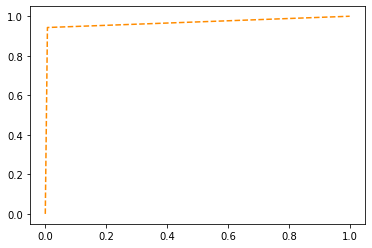

In [30]:
plt.plot(fpr, tpr,  linestyle='--', color='darkorange',
         label='ROC curve (area = %0.2f)' )

In [0]:
# yhat=y_hat
y_test_arr=y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn import metrics

[[109253   2130]
 [  6377 448117]]


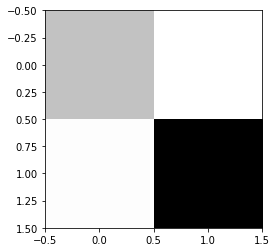

In [0]:

cm=metrics.confusion_matrix(y_test,yhat)
print(cm)
plt.imshow(cm, cmap='binary')

In [0]:
true={}
false={}
not_detected={}

for x in range(len(y_test_arr)):
    if y_test_arr[x]==yhat[x]:
      if y_test_arr[x] in true:
        true[y_test_arr[x]]=true[y_test_arr[x]]+1
      else:
        true[y_test_arr[x]]=1
    elif y_test_arr[x]!=yhat[x]:
      if yhat[x] in false:
        false[yhat[x]]=false[yhat[x]]+1

        if y_test_arr[x] in not_detected:
          not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
        else:
          not_detected[y_test_arr[x]]=1

      else:
        false[yhat[x]]=1

        if y_test_arr[x] in not_detected:
          not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
        else:
          not_detected[y_test_arr[x]]=1

In [0]:
true

{'ATTACK': 109241, 'BENIGN': 447944}

In [0]:
false

{'ATTACK': 6550, 'BENIGN': 2142}

In [0]:
not_detected

{'ATTACK': 2142, 'BENIGN': 6550}

### save knn_model for future use

In [0]:
import pickle
filename = 'finalized_model.sav'

In [0]:

pickle.dump(model_knn, open(filename, 'wb'))

In [0]:

# load the model from disk
model_knn = pickle.load(open(filename, 'rb'))
y_hat=model_knn.predict(X_test)


### 2) Naive bayes

#####     2.1) Gaussian naive bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
t1=time.time()

gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
yhat=model_gnb.predict(X_test)

print("Accuracy :: ", accuracy_score(y_test,yhat))

t2=time.time()
print(" time for Naive Baye's :: ", (t2-t1) , " seconds")

Accuracy ::  0.24458672114258045
 time for Naive Baye's ::  5.770077228546143  seconds


results for gausian naive bayes are not very good, so we use bernoulli Naive Bayes

##### 2.2) Bernoulli Naive Bayes

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
print("Accuracy ::: ", accuracy_score(y_test,yhat))

Accuracy :::  0.7976980863332491


#### Scatter plot

In [0]:
plt.scatter(y_test,yhat)

In [0]:
type(y_test)

In [0]:
type(yhat)

In [0]:

true_benign=0
true_ftp=0
true_ssh=0
false_benign=0
false_ftp=0
false_ssh=0
print(len(y_test_arr))
for x in range(len(y_test_arr)):
    if y_test_arr[x]==yhat[x] and y_test_arr[x]=="BENIGN":
        true_benign=true_benign+1
    elif y_test_arr[x]==yhat[x] and y_test_arr[x]=="FTP-Patator":
        true_ftp=true_ftp+1
    elif y_test_arr[x]==yhat[x] and y_test_arr[x]=="SSH-Patator":
        true_ssh=true_ssh+1
    elif y_test_arr[x]!=yhat[x]:
        if yhat[x]=="BENIGN":
            false_benign=false_benign+1
        elif yhat[x]=="FTP-Patator":
            false_ftp=false_ftp+1
        elif yhat[x]=="SSH-Patator":
            false_ssh=false_ssh+1
print("true benign  ::: ", true_benign )
print("true ftp  ::: ", true_ftp )
print("true ssh  ::: ", true_ssh )
print("false benign  ::: ", false_benign )
print("false ftp ::: ", false_ftp )
print("fasle ssh  ::: ", false_ssh )

565877
true benign  :::  450872
true ftp  :::  1536
true ssh  :::  611
false benign  :::  5575
false ftp :::  12
fasle ssh  :::  1


In [0]:
y_test_arr=y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
true={}
false={}
not_detected={}
for x in range(len(y_test_arr)):
    if y_test_arr[x]==yhat[x]:
      if y_test_arr[x] in true:
        true[y_test_arr[x]]=true[y_test_arr[x]]+1
      else:
        true[y_test_arr[x]]=1
    elif y_test_arr[x]!=yhat[x]:
      if yhat[x] in false:
        false[yhat[x]]=false[yhat[x]]+1

        if y_test_arr[x] in not_detected:
          not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
        else:
          not_detected[y_test_arr[x]]=1

      else:
        false[yhat[x]]=1

        if y_test_arr[x] in not_detected:
          not_detected[y_test_arr[x]]=not_detected[y_test_arr[x]]+1
        else:
          not_detected[y_test_arr[x]]=1

In [0]:
true

{'BENIGN': 450872,
 'Bot': 156,
 'DDoS': 25475,
 'DoS GoldenEye': 1959,
 'DoS Hulk': 41791,
 'DoS Slowhttptest': 1032,
 'DoS slowloris': 1127,
 'FTP-Patator': 1536,
 'PortScan': 31695,
 'SSH-Patator': 611,
 'Web Attack-Brute Force': 243,
 'Web Attack-XSS': 19}

In [0]:
false

{'BENIGN': 5575,
 'Bot': 24,
 'DDoS': 120,
 'DoS GoldenEye': 122,
 'DoS Hulk': 2939,
 'DoS Slowhttptest': 86,
 'DoS slowloris': 42,
 'FTP-Patator': 12,
 'PortScan': 325,
 'SSH-Patator': 1,
 'Web Attack-Brute Force': 88,
 'Web Attack-XSS': 27}

In [0]:
not_detected

{'BENIGN': 3622,
 'Bot': 212,
 'DDoS': 59,
 'DoS GoldenEye': 81,
 'DoS Hulk': 4500,
 'DoS Slowhttptest': 16,
 'DoS slowloris': 35,
 'FTP-Patator': 31,
 'Heartbleed': 2,
 'Infiltration': 8,
 'PortScan': 47,
 'SSH-Patator': 596,
 'Web Attack-Brute Force': 58,
 'Web Attack-Sql Injection': 5,
 'Web Attack-XSS': 89}

In [0]:
# y_hat= saved model output
true_benign=0
true_ftp=0
true_ssh=0
false_benign=0
false_ftp=0
false_ssh=0

for x in range(len(y_test_arr)):
    
    if y_hat[x]=="BENIGN":
        if y_hat[x]==y_test_arr[x]:
            true_benign=true_benign+1
        else:
            false_benign=false_benign+1
            
    elif y_hat[x]=="FTP-Patator":
        
        if y_hat[x]==y_test_arr[x]:
            true_ftp=true_ftp+1
        else:
            false_ftp=false_ftp+1
            
    elif y_hat[x]=="SSH-Patator":
        if y_hat[x]==y_test_arr[x]:
            true_ssh=true_ssh+1
        else:
            false_ssh=false_ssh+1
            
print("true benign  ::: ", true_benign )
print("true ftp  ::: ", true_ftp )
print("true ssh  ::: ", true_ssh )
print("false benign  ::: ", false_benign )
print("false ftp ::: ", false_ftp )
print("fasle ssh  ::: ", false_ssh )

## Visualization of results

### 1. Pie Chart

In [0]:
ser={}
ser['true_benign']=true_benign
ser['true ftp']=true_ftp
ser['true ssh']=true_ssh
ser['false benign']=false_benign
ser['false ftp']=false_ftp
ser['false ssh']=false_ssh

In [0]:
series = pd.Series(ser) 


In [0]:
colors_list = ['skyblue', 'yellowgreen', 'red', 'pink', 'black', 'blue']
explode_list = [0, 0.1, 0, 0.4, 0.6, 0.8] # ratio for each continent with which to offset each wedge.

series.plot(kind='pie',
                            figsize=(8, 10),
                            autopct='%1.1f%%',
                            startangle=25,# add in percentages
#                           shadow=False,
                            labels=None,
                            pctdistance=1.12, 
                            explode=explode_list,
                            colors=colors_list,  # add custom colors

           )

plt.title('KNN results ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=series.index, loc='upper right') 

plt.show()

#### Pie chart with TP,FP,TN,FN

In [0]:
ser3={}
ser3['true positive']=true_ftp+true_ssh
ser3['true negative']=true_benign
ser3['false positive']=false_ftp+false_ssh
ser3['false negative']=false_benign

In [0]:
series3 = pd.Series(ser3) 


In [0]:
colors_list = ['red', 'gray','black', 'skyblue' ]
explode_list = [0, 0.2, 0.8, 0.4] # ratio for each continent with which to offset each wedge.

series3.plot(kind='pie',
                            figsize=(8, 10),
                            autopct='%1.1f%%',
                            startangle=25,# add in percentages
#                           shadow=False,
                            labels=None,
                            pctdistance=1.12, 
                            explode=explode_list,
                            colors=colors_list,  # add custom colors

           )

plt.title('KNN results ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=series3.index, loc='upper right') 

plt.show()